In [43]:
import csv
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as snNew

In [44]:
header = None
x_train = list()
y_train = list()
with open("mydata.csv",'r', encoding='utf-8') as f:
    rows = csv.reader(f)
    # 以迴圈輸出每一列
    for row in rows:
        if header == None:
            header = row
            continue
        for i in range(9):
            row[i] = float(row[i])
        row[9]=bool(row[9])
        row[10]=float(row[10])
        row[11]=bool(row[10])
        row[12]=bool(row[10])
        for i in range(13,16):
            row[i] = int(row[i])
        x_train.append(row[:-1])
        y_train.append(row[-1])

In [45]:
header = None
x_test = list()
y_test = list()
with open("mydata_test.csv",'r', encoding='utf-8') as f:
    rows = csv.reader(f)
    # 以迴圈輸出每一列
    for row in rows:
        if header == None:
            header = row
            continue
        for i in range(9):
            row[i] = float(row[i])
        row[9]=bool(row[9])
        row[10]=float(row[10])
        row[11]=bool(row[10])
        row[12]=bool(row[10])
        for i in range(13,16):
            row[i] = int(row[i])
        x_test.append(row[:-1])
        y_test.append(row[-1])

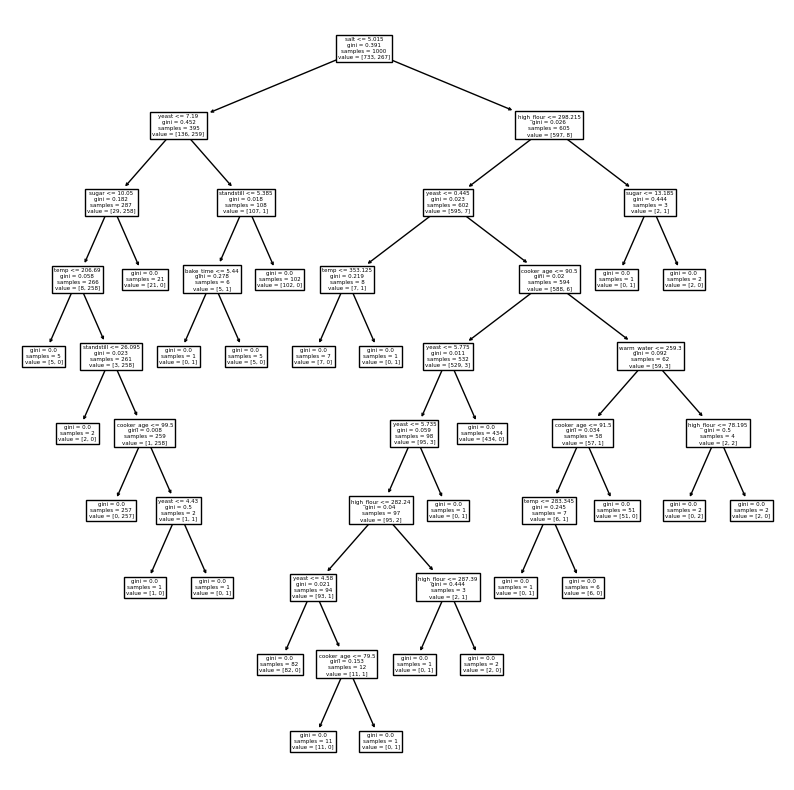

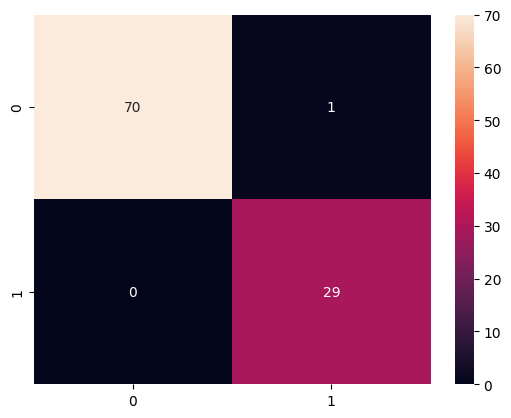

In [46]:
clf_tree = tree.DecisionTreeClassifier(random_state=1234)
model_tree = clf_tree.fit(x_train, y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(model_tree,feature_names=header)
plt.show()
y_predict = clf_tree.predict(x_test)
m = confusion_matrix(y_test, y_predict)
snNew.heatmap(m, annot=True)
plt.show()

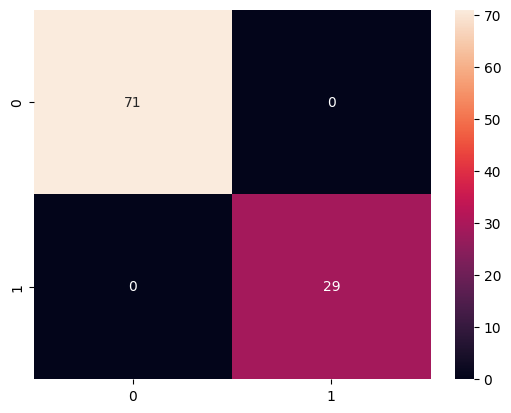

In [47]:
clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svm.fit(x_train, y_train)
y_predict = clf_svm.predict(x_test)
m = confusion_matrix(y_test, y_predict)
snNew.heatmap(m, annot=True)
plt.show()

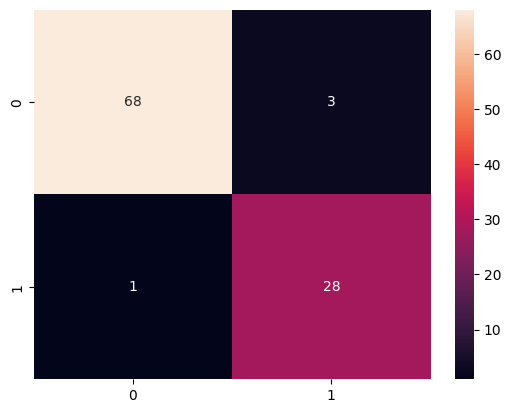

In [48]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)
y_predict = neigh.predict(x_test)
m = confusion_matrix(y_test, y_predict)
snNew.heatmap(m, annot=True)
plt.show()

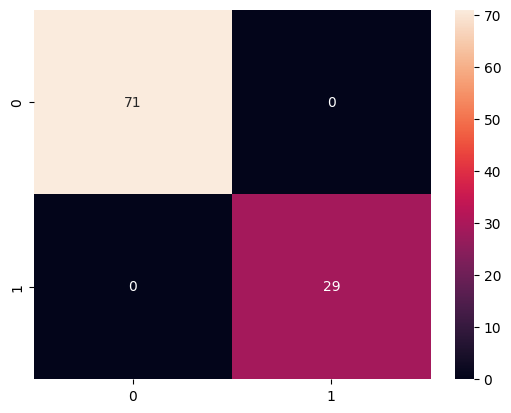

In [49]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_predict = gnb.predict(x_test)
m = confusion_matrix(y_test, y_predict)
snNew.heatmap(m, annot=True)
plt.show()